In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation,Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
img_width,img_height=224,224
input_shape=(img_width,img_height,3)

In [3]:
train_dir='cats-and-dogs/train'
test_dir='cats-and-dogs/test'

In [4]:
import os 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
train_datagen=ImageDataGenerator(rescale=1. /255,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)

In [8]:
test_datagen=ImageDataGenerator(rescale=1. /255)

In [19]:
train_datagenerator=train_datagen.flow_from_directory(train_dir,batch_size=10,target_size=(img_width,img_height),class_mode='binary')
train_datagenerator.class_indices

Found 40 images belonging to 2 classes.


{'cat': 0, 'dog': 1}

In [10]:
test_datagenerator=test_datagen.flow_from_directory(test_dir,batch_size=10,target_size=(img_width,img_height),class_mode='binary')

Found 10 images belonging to 2 classes.


In [11]:
history=model.fit_generator(train_datagenerator,steps_per_epoch=10,epochs=5,validation_data=test_datagenerator,validation_steps=5)




Epoch 1/5





10/10 [==============================] - 16s 2s/step - loss: 7.6449 - acc: 0.4800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
10/10 [==============================] - 13s 1s/step - loss: 7.8979 - acc: 0.5100 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
10/10 [==============================] - 13s 1s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
10/10 [==============================] - 13s 1s/step - loss: 7.5755 - acc: 0.5300 - val_loss: 8.0590 - val_acc: 0.5000


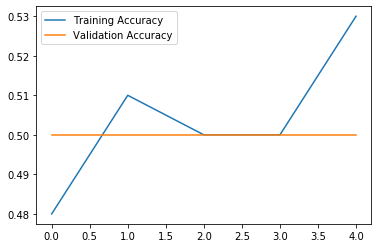

In [12]:
acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(len(acc))
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.legend()

In [13]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model.predict_generator(test_datagenerator,1)
y_pred=np.argmax(y_pred,axis=1)
confusion_matrix(test_datagenerator.classes,y_pred)

array([[5, 0],
       [5, 0]], dtype=int64)

In [14]:
print(classification_report(test_datagenerator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.00      0.00      0.00         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



C:\Users\SRI HARI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
import shutil
os.makedirs('cats-and-dogs/new1')
os.makedirs('cats-and-dogs/new2')
for f in os.listdir('cats-and-dogs/image'):
    path='cats-and-dogs/image/'+str(f)
    print(path)
    img=plt.imread(path)
    if 'cat' in str(f):
        shutil.move(path,'cats-and-dogs/new1')
    else:
        shutil.move(path,'cats-and-dogs/new2')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'cats-and-dogs/new1'

In [ ]:
for f in os.listdir('cats-and-dogs/new1'):
    path='cats-and-dogs/image/'+str(f)
    print(str(f))

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)